In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, ks_2samp
import pickle

In [2]:
# Carica i dati dal file
with open('/content/drive/MyDrive/Progetto DSN/Analysis_Data/fractal_dimensions.pkl', 'rb') as file:
    fractal_data = pickle.load(file)

fractal_dimensions_VISp = fractal_data['VISp']
fractal_dimensions_VISal = fractal_data['VISal']
fractal_dimensions_SSp_bfd = fractal_data['SSp_bfd']

Statistiche descrittive per VISp: {'mean': 1.5297329371420287, 'std': 0.24705318269679755, 'median': 1.5203440977170142}
Statistiche descrittive per VISal: {'mean': 1.5215044430697393, 'std': 0.1334065813594462, 'median': 1.5196959865628825}
Statistiche descrittive per SSp_bfd: {'mean': 1.5647662587851157, 'std': 0.15049854874417135, 'median': 1.56715002776671}


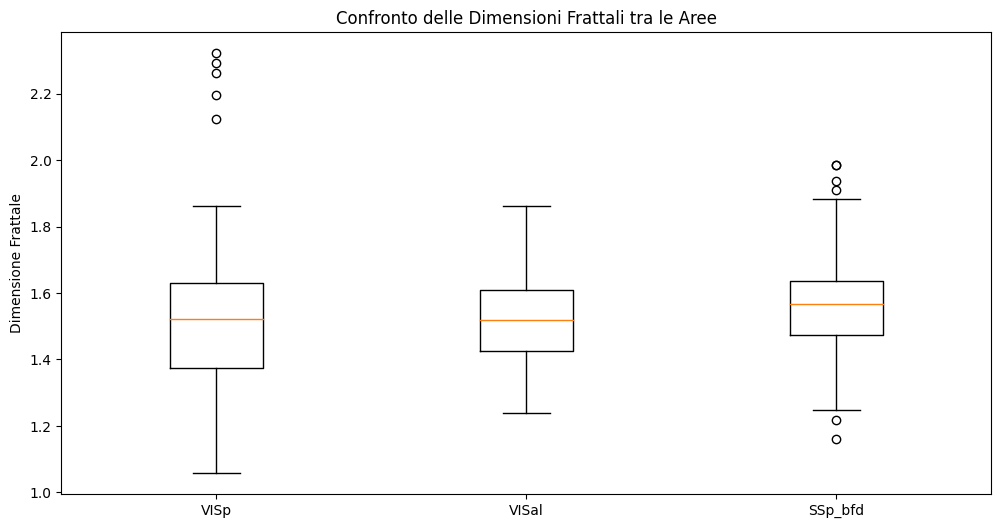

In [3]:
# Analisi statistica
def descriptive_stats(data):
    return {
        'mean': np.mean(data),
        'std': np.std(data),
        'median': np.median(data)
    }

stats_VISp = descriptive_stats(fractal_dimensions_VISp)
stats_VISal = descriptive_stats(fractal_dimensions_VISal)
stats_SSp_bfd = descriptive_stats(fractal_dimensions_SSp_bfd)

print("Statistiche descrittive per VISp:", stats_VISp)
print("Statistiche descrittive per VISal:", stats_VISal)
print("Statistiche descrittive per SSp_bfd:", stats_SSp_bfd)

# Visualizzazione dei risultati
plt.figure(figsize=(12, 6))
plt.boxplot([fractal_dimensions_VISp, fractal_dimensions_VISal, fractal_dimensions_SSp_bfd], labels=['VISp', 'VISal', 'SSp_bfd'])
plt.ylabel('Dimensione Frattale')
plt.title('Confronto delle Dimensioni Frattali tra le Aree')
plt.show()

In [4]:
# Eseguire il t-test tra VISp e VISal
t_statistic_VISp_VISal, p_value_VISp_VISal = ttest_ind(fractal_dimensions_VISp, fractal_dimensions_VISal)
print(f"T-test VISp vs VISal: t-statistic = {t_statistic_VISp_VISal} , p-value = {p_value_VISp_VISal}")

# Eseguire il t-test tra VISp e SSp_bfd
t_statistic_VISp_SSp_bfd, p_value_VISp_SSp_bfd = ttest_ind(fractal_dimensions_VISp, fractal_dimensions_SSp_bfd)
print(f"T-test VISp vs SSp_bfd: t-statistic = {t_statistic_VISp_SSp_bfd} , p-value = {p_value_VISp_SSp_bfd}")

# Eseguire il t-test tra VISal e SSp_bfd
t_statistic_VISal_SSp_bfd, p_value_VISal_SSp_bfd = ttest_ind(fractal_dimensions_VISal, fractal_dimensions_SSp_bfd)
print(f"T-test VISal vs SSp_bfd: t-statistic = {t_statistic_VISal_SSp_bfd} , p-value = {p_value_VISal_SSp_bfd}")

# Eseguire il KS-test tra VISp e VISal
ks_statistic_VISp_VISal, ks_p_value_VISp_VISal = ks_2samp(fractal_dimensions_VISp, fractal_dimensions_VISal)
print(f"KS-test VISp vs VISal: ks-statistic = {ks_statistic_VISp_VISal} , p-value = {ks_p_value_VISp_VISal}")

# Eseguire il KS-test tra VISp e SSp_bfd
ks_statistic_VISp_SSp_bfd, ks_p_value_VISp_SSp_bfd = ks_2samp(fractal_dimensions_VISp, fractal_dimensions_SSp_bfd)
print(f"KS-test VISp vs SSp_bfd: ks-statistic = {ks_statistic_VISp_SSp_bfd} , p-value = {ks_p_value_VISp_SSp_bfd}")

# Eseguire il KS-test tra VISal e SSp_bfd
ks_statistic_VISal_SSp_bfd, ks_p_value_VISal_SSp_bfd = ks_2samp(fractal_dimensions_VISal, fractal_dimensions_SSp_bfd)
print(f"KS-test VISal vs SSp_bfd: ks-statistic = {ks_statistic_VISal_SSp_bfd} , p-value = {ks_p_value_VISal_SSp_bfd}")

T-test VISp vs VISal: t-statistic = 0.17765246646944544 , p-value = 0.8593005213250421
T-test VISp vs SSp_bfd: t-statistic = -1.2230150348039783 , p-value = 0.222792476896003
T-test VISal vs SSp_bfd: t-statistic = -1.4566818615462678 , p-value = 0.14744337353227574
KS-test VISp vs VISal: ks-statistic = 0.16477272727272727 , p-value = 0.4949076103997262
KS-test VISp vs SSp_bfd: ks-statistic = 0.2318181818181818 , p-value = 0.008774888066153622
KS-test VISal vs SSp_bfd: ks-statistic = 0.25738636363636364 , p-value = 0.06069029279191727


### Interpretazione dei Risultati

#### T-test:
Il t-test verifica se le medie di due gruppi sono significativamente diverse.

- **T-test VISp vs VISal:**
  - **t-statistic = 0.17765246646944544**
  - **p-value = 0.8593005213250421**

  Un valore p molto alto (0.859) indica che non c'è una differenza significativa tra le medie delle dimensioni frattali delle aree VISp e VISal.

- **T-test VISp vs SSp_bfd:**
  - **t-statistic = -1.2230150348039783**
  - **p-value = 0.222792476896003**

  Anche qui, il valore p è abbastanza alto (0.223), indicando che non c'è una differenza significativa tra le medie delle dimensioni frattali delle aree VISp e SSp_bfd.

- **T-test VISal vs SSp_bfd:**
  - **t-statistic = -1.4566818615462678**
  - **p-value = 0.14744337353227574**

  Ancora una volta, un valore p di 0.147 suggerisce che non c'è una differenza significativa tra le medie delle dimensioni frattali delle aree VISal e SSp_bfd.

#### KS-test:
Il test di Kolmogorov-Smirnov (KS-test) confronta le distribuzioni di due campioni.

- **KS-test VISp vs VISal:**
  - **ks-statistic = 0.16477272727272727**
  - **p-value = 0.4949076103997262**

  Un valore p alto (0.495) indica che non c'è una differenza significativa tra le distribuzioni delle dimensioni frattali delle aree VISp e VISal.

- **KS-test VISp vs SSp_bfd:**
  - **ks-statistic = 0.2318181818181818**
  - **p-value = 0.008774888066153622**

  Un valore p molto basso (0.009) suggerisce una differenza significativa tra le distribuzioni delle dimensioni frattali delle aree VISp e SSp_bfd.

- **KS-test VISal vs SSp_bfd:**
  - **ks-statistic = 0.25738636363636364**
  - **p-value = 0.06069029279191727**

  Un valore p vicino a 0.061 indica che c'è una differenza marginalmente significativa tra le distribuzioni delle dimensioni frattali delle aree VISal e SSp_bfd.

### Conclusioni

1. **T-test**: Nessuna delle aree confrontate (VISp vs VISal, VISp vs SSp_bfd, VISal vs SSp_bfd) mostra una differenza significativa nelle medie delle dimensioni frattali.

2. **KS-test**:
   - Non c'è una differenza significativa tra le distribuzioni delle dimensioni frattali delle aree VISp e VISal.
   - C'è una differenza significativa tra le distribuzioni delle dimensioni frattali delle aree VISp e SSp_bfd.
   - C'è una differenza marginalmente significativa tra le distribuzioni delle dimensioni frattali delle aree VISal e SSp_bfd.

Questi risultati suggeriscono che, mentre le medie delle dimensioni frattali non differiscono significativamente tra le aree, le distribuzioni delle dimensioni frattali mostrano differenze significative, specialmente tra VISp e SSp_bfd. Questo può indicare che la complessità strutturale dei neuroni varia tra queste aree in modi che non sono completamente catturati dalla media delle dimensioni frattali.